In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shiningflash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('data/IMDB Dataset.csv', nrows = 5000)

In [3]:
df['sentiment'] = np.array(list(map(lambda x: 1 if x == "positive" else 0, df['sentiment'])))

In [4]:
df.head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
print('size dataset: {}'.format(df.shape))

size dataset: (5000, 2)


In [6]:
corpus = []

for j in range(0, len(df)):
    df['text'] = df['text'].apply(str)
    review = re.sub('[^a-zA-Z]', ' ', df['text'][j])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [7]:
cv = CountVectorizer(max_features = 5000)
le = LabelEncoder()

In [8]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [9]:
y = le.fit_transform(y)

In [10]:
X = X.transpose()
print(X.shape[0], y.shape[0])

5000 5000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(y_pred[:10])

[0 1 0 0 0 1 1 0 1 1]


In [15]:
print('Accuracy for dataset: {}%'.format((accuracy_score(y_test, y_pred)*100)))

Accuracy for dataset: 48.559999999999995%


for IMDB Dataset:


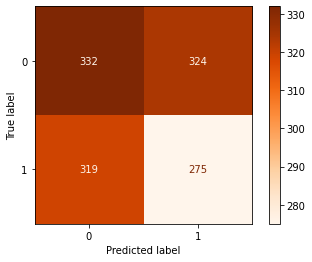

In [16]:
print('for IMDB Dataset:')
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Oranges)